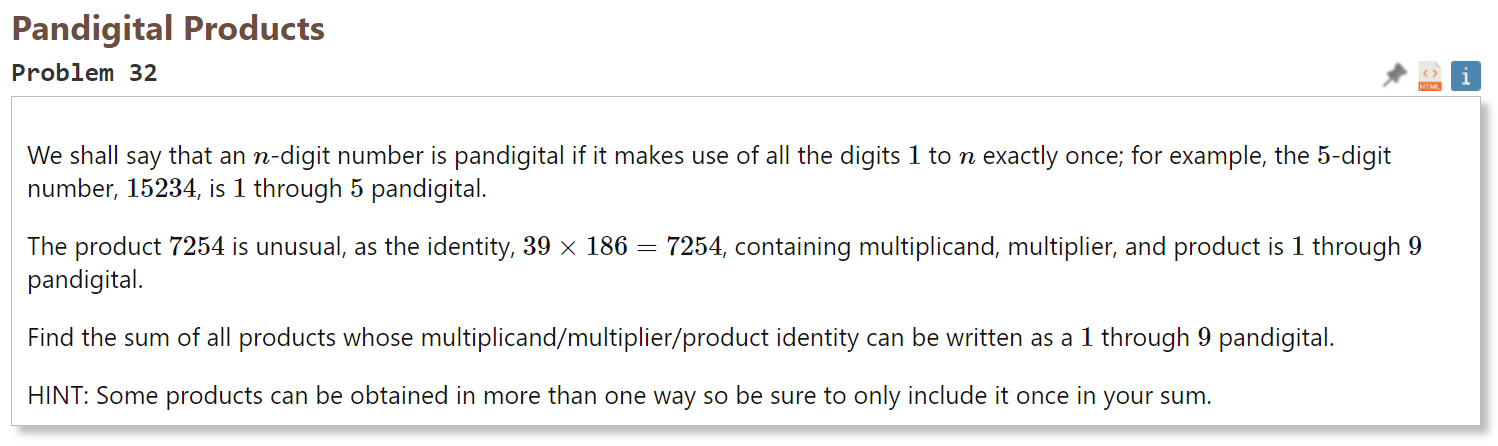

Given a number $x$ and its digits $x_n$: $10^{x_n-1} \le x < 10^{x_n}$  
Given two numbers $m, c$ with digits $m_n, c_n$,  
and their product $p$,  
$10^{m_n + c_n - 2} \le m*n < 10^{m_n + c_n}$  
=> $10^{m_n + c_n - 2} < 10^{p_n}$, $10^{p_n - 1} < 10^{m_n + c_n}$  
=> $m_n + c_n - 2 < p_n$, $p_n - 1 < m_n + c_n$ (log 10 is an increasing function)  
=> $m_n + c_n - 2 < p_n < m_n + c_n + 1$  

Given for this question $m_n + c_n + p_n = n$,  
=> $n - p_n - 2 < p_n < n - p_n + 1$  
=> $n - 2 < 2*p_n < n + 1$  
=> $\frac{n - 2}{2} < p_n < \frac{n + 1}{2}$  

We will have $m_n \le c_n$ by convention  

One idea is to check all possible products that only use one digit <= n,  
so if we are dealing with n = 7 with p = 3 we could try 135 or 623 but we cant try 813 (8 > 7) or 533 (duplicate 3) for instance.  

Another is just to try all possible mults and cands

In [101]:
def is_pandigital(str_mult, str_cad, str_prod, n):
    if len({d for d in str_mult+str_cad+str_prod if int(d) <= n}) == n:
        return True
    else:
        return False

assert is_pandigital('39', '186', '7254', 9) == True
assert is_pandigital('3', '4', '12', 4) == True
assert is_pandigital('15', '27', '405', 7) == False
assert is_pandigital('2', '9', '18', 4) == False
assert is_pandigital('1', '1', '1', 3) == False

In [114]:
def pandigital_products(n):
    digits = {d for d in range(1, n+1)}
    # Try a p with this manh digits upwards
    base_product_n = ((n - 2)//2) + 1
    max_product_n = n + 1

    if max_product_n%2==0:
        max_product_n = (max_product_n//2) - 1
    else:
        max_product_n = max_product_n//2
    sums = set()
    for prod_n in range(base_product_n, max_product_n+1):
        # We treat the mult as the smaller multiplier and cand as bigger
        # So we set the max of the digits of mult equal to half the digits left from n and p
        max_mult_n = (n - prod_n)//2
        for mult_n in range(1, max_mult_n+1):
            cad_n = n - prod_n - mult_n
            cad_range = range(10**(cad_n-1), 10**cad_n)
            for cad in cad_range:
                mult_range = range(10**(mult_n-1), min(10**mult_n, cad))
                str_cad = str(cad)
                if '0' in str_cad:
                    continue
                for mult in mult_range:
                    str_mult = str(mult)
                    if '0' in str_mult:
                        continue
                    prod = mult*cad
                    str_prod = str(prod)
                    if '0' in str_prod or len(str_prod) > prod_n:
                        continue
                    if is_pandigital(str_mult, str_cad, str_prod, n):
                        #print(f'{str_mult=} {str_cad=} {str_prod=} {n=}')
                        sums.add(prod)
    #print(sums)
    return sum(sums)

assert pandigital_products(1) == 0
assert pandigital_products(2) == 0
assert pandigital_products(3) == 0
assert pandigital_products(4) == 12
assert pandigital_products(5) == 52

In [116]:
%%timeit
pandigital_products(9)

91.5 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
